# ML using Python : Random Forest

Priyaranjan Mohanty

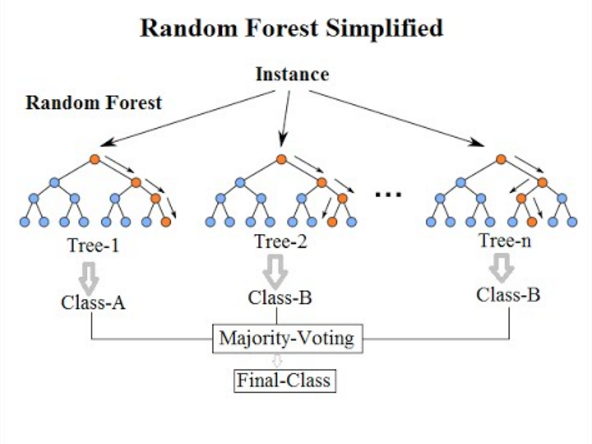

<b>Decision Trees </b> are the Building Blocks of Random Forest.

The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees may not be accurate, but combined together, the predictions will be closer to the mark on average.

## Why the name ‘Random Forest?’ 

Well, much as people might rely on different sources to make a prediction, each decision tree in the forest considers a random subset of features when forming questions and only has access to a random set of the training data points. 

This increases diversity in the forest leading to more robust overall predictions and the name <b>‘random forest’</b>. 

When it comes time to make a prediction, the random forest takes an average of all the individual decision tree estimates. (This is the case for a regression task. The other class of problems is known as classification, where the targets are a discrete class label such as cloudy or sunny. In that case, the random forest will take a majority vote for the predicted class).


###### In essence , there are two fundamental ideas behind a random forest, both of which are well known to us in our daily life:

    a) Constructing a flowchart of questions and answers leading to a decision

    b) The wisdom of the (random and diverse) crowd

It is the combination of these basic ideas that lead to the power of the random forest model.

## Case Study - Predicting the Temperature using Random Forest 

#### Problem / Opportunity Introduction :

The problem we will tackle is predicting the max temperature for tomorrow in a city using one year of past weather data. 

We will be using Seattle, WA . 

We are going to act as if we don’t have access to any weather forecasts. 

What we do have is access to one year of 

a) historical max temperatures, 

b) the temperatures for the previous two days, 

c) and an estimate from a friend who is always claiming to know everything about the weather. 



This is a supervised, regression machine learning problem. 

It’s supervised because we have both the features (data for the city) and the targets (temperature) that we want to predict. 

During training, we give the random forest both the features and targets and it must learn how to map the data to a prediction. 

Moreover, this is a regression task because the target value is continuous (as opposed to discrete classes in classification). 

### Let's implement the Random Forest Regressor using Python 

### Step 1 : Data Ingestion 

Data Ingestion is the process of accessing and importing data for immediate use .

In [1]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data and display first 5 rows
Temperature_DF = pd.read_csv('temps.csv')


### Step 2 : EDA 

EDA stands for Exploratory Data Analysis

In [2]:
# Show the first 5 observations from the Dataframe
Temperature_DF.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41




#### Following are explanations of the columns:

<b>year</b>   : 2016 for all data points

<b>month</b>  : number for month of the year

<b>day</b>    : number for day of the year

<b>week</b>   : day of the week as a character string

<b>temp_2</b> : max temperature 2 days prior

<b>temp_1</b> : max temperature 1 day prior

<b>average</b>: historical average max temperature

<b>actual</b> : max temperature measurement          <u><b><== This Column is Target variable</b></u>

<b>friend</b> : your friend’s prediction, a random number between 20 below the average and 20 above the average



In [3]:
# Get the dimension of the Dataframe

print('The shape of our features is:', Temperature_DF.shape)

The shape of our features is: (348, 12)


In [8]:
# Get the information of the Dataframe ( like the structure of the Dataframe)

Temperature_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [10]:
# Get the statistical Summary of the data in the Dataframe

Temperature_DF.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### Step 3 : Data Pre-Processing 

##### 3.a : One-Hot Encoding ( OHE )

The first step for us is known as one-hot encoding of the data. This process takes categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering. Days of the week are intuitive to us because we use them all the time. You will (hopefully) never find anyone who doesn’t know that ‘Mon’ refers to the first day of the workweek, but machines do not have any intuitive knowledge. What computers know is numbers and for machine learning we must accommodate them. We could simply map days of the week to numbers 1–7, but this might lead to the algorithm placing more importance on Sunday because it has a higher numerical value. Instead, we change the single column of weekdays into seven columns of binary data. This is best illustrated pictorially. One hot encoding takes this:

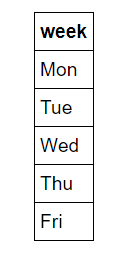


and turns it into

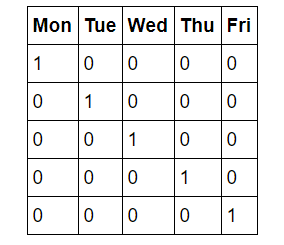

So, if a data point is a Wednesday, it will have a 1 in the Wednesday column and a 0 in all other columns. This process can be done in pandas in a single line!

In [4]:
# One-hot encode the data using pandas get_dummies
Temperature_DF = pd.get_dummies(Temperature_DF)


In [5]:
# Display the first 5 rows 
Temperature_DF.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [16]:
# check the revised shape of the Dataframe

Temperature_DF.shape

(348, 18)

#### Step 4 : Features Separation -

Creating separate Data Objects for Predictor & Response variables 

In [6]:
# Create the Predictor set of variables
# Remove the Response Column from the features
# axis 1 refers to the columns

X = Temperature_DF.drop('actual', axis = 1)

In [7]:
# Create the Response Variable 

Y = Temperature_DF.actual

#### Step 5 : Split the Data into Train & Test 

final step of data preparation:splitting data into training and testing sets. 

During training, we let the model ‘see’ the answers, in this case the actual temperature, so it can learn how to predict the temperature from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. 

Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! 

Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is.

Generally, when training a model, we randomly split the data into training and testing sets to get a representation of all data points (if we trained on the first nine months of the year and then used the final three months for prediction, our algorithm would not perform well because it has not seen any data from those last three months.) I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [9]:
print('Training Features Shape :', train_X.shape)
print('Training Labels Shape   :', train_Y.shape)

print('\n')

print('Testing Features Shape  :', test_X.shape)
print('Testing Labels Shape    :', test_Y.shape)

Training Features Shape : (278, 17)
Training Labels Shape   : (278,)


Testing Features Shape  : (70, 17)
Testing Labels Shape    : (70,)


#### Step 6 : Train the Model 

a) We import the random forest regression model from skicit-learn, 

b) instantiate the model, 

c) and fit (scikit-learn’s name for training) the model on the training data.

In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
RF_Regressor = RandomForestRegressor(n_estimators = 1000, 
                                       random_state = 42)

# Train the model on training data
RF_Regressor.fit(train_X, train_Y);

##### What is n_estimators parmater 

n_estimators is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

#### Step 7 : Make Predictions on the Test Set

Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value 

In [11]:
# Use the forest's predict method on the test data
Test_Pred = RF_Regressor.predict(test_X)

In [12]:
from sklearn.metrics import mean_squared_error as MSE 

Test_MSE = MSE(test_Y , Test_Pred)

Test_RMSE = Test_MSE ** (1/2)

Test_RMSE

5.10812366725787

In [13]:
R2 = RF_Regressor.score(train_X , train_Y)

R2

0.9750464270871588

### Identifying the Important Features

In [14]:
Ftr_Imp_List = list(RF_Regressor.feature_importances_)

In [16]:
Ftr_Imp_List

[0.0,
 0.010496152904355153,
 0.02012240357038987,
 0.01715766077112161,
 0.6740379469702727,
 0.14962408274985112,
 0.026114929913979797,
 0.048901096989227184,
 0.016290001731450655,
 0.020830693431306172,
 0.0027642838796464375,
 0.002774019112720168,
 0.0029938154285335614,
 0.002405061789503093,
 0.001430539406816259,
 0.0021052847838364933,
 0.00195202656699025]

In [72]:
Ftr_Imp_Rank = [sorted(Ftr_Imp_List,reverse=True).index(n) for n in Ftr_Imp_List]

In [73]:
train_X.columns[Ftr_Imp_Rank]

Index(['week_Wed', 'forecast_under', 'average', 'forecast_noaa', 'year',
       'month', 'temp_2', 'day', 'forecast_acc', 'temp_1', 'week_Mon',
       'week_Fri', 'friend', 'week_Sat', 'week_Tues', 'week_Sun',
       'week_Thurs'],
      dtype='object')